In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
import matplotlib.ticker as mticker
import csv
import pylab
from scipy.interpolate import interp1d


np.set_printoptions(threshold=sys.maxsize)


In [2]:
time_list_compactODE = []
dt_array_compactODE = []
V_array_compactODE = []
F_array_compactODE = []
rhs_count_array_compactODE = []
ksp_count_array_compactODE = []
max_S_compactODE = []
min_S_compactODE = []
max_PSI_compactODE = []
min_PSI_compactODE = []
time_old = 0.0



#don't plot first two components
first = 1
second = 1

with open('../results/TANDEM_size30__AS_compactode_5dp_Satol1e-08__EQ_compactode_5dp_Satol1e-05.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if second:
            second = 0
        if first:
            first = 0
            second = 1
        else:
            time = row['time']
            dt = float(time) - time_old
            time_old = float(time)
            time_list_compactODE.append(time)
            dt_array_compactODE.append(dt)

            V_array_compactODE.append(row['Vmax'])
            F_array_compactODE.append(row['fmax'])
            rhs_count_array_compactODE.append(row['count_rhs'])
            ksp_count_array_compactODE.append(row['KSP_iteration'])
            max_S_compactODE.append(row['maxS'])
            min_S_compactODE.append(row['minS'])
            max_PSI_compactODE.append(row['maxPSI'])
            min_PSI_compactODE.append(row['minPSI'])
            
            
            if (row['t_init']):
                initialization_time_compactODE = row['t_init']
            if (row['t_solve']):
                solve_time_compactODE = row['t_solve']
            if (row['t_total']):
                total_time_compactODE = row['t_total']

time_array_compactODE = np.asarray(time_list_compactODE, dtype=np.float64)
dt_array_compactODE = np.asarray(dt_array_compactODE, dtype=np.float64)
V_array_compactODE = np.asarray(V_array_compactODE, dtype=np.float64)
F_array_compactODE = np.asarray(F_array_compactODE, dtype=np.float64)
rhs_count_array_compactODE = np.asarray(rhs_count_array_compactODE, dtype=np.float64)
ksp_count_array_compactODE = np.asarray(ksp_count_array_compactODE, dtype=np.float64)
max_S_compactODE = np.asarray(max_S_compactODE, dtype=np.float64)
min_S_compactODE = np.asarray(min_S_compactODE, dtype=np.float64)
max_PSI_compactODE = np.asarray(max_PSI_compactODE, dtype=np.float64)
min_PSI_compactODE = np.asarray(min_PSI_compactODE, dtype=np.float64)

time_years_compactODE = time_array_compactODE / (365.2425*24*3600)

In [3]:
time_list_BDFcompactODE = []
dt_array_BDFcompactODE = []
V_array_BDFcompactODE = []
F_array_BDFcompactODE = []
rhs_count_array_BDFcompactODE = []
ksp_count_array_BDFcompactODE = []
max_S_BDFcompactODE = []
min_S_BDFcompactODE = []
max_PSI_BDFcompactODE = []
min_PSI_BDFcompactODE = []
time_old = 0.0



#don't plot first two components
first = 1
second = 1

with open('../results/TANDEM_size30__AS_compactode_BDF0_sor-gmres_Satol1e-08__EQ_compactode_BDF0_sor-gmres_Satol1e-05.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if second:
            second = 0
        if first:
            first = 0
            second = 1
        else:
            time = row['time']
            dt = float(time) - time_old
            time_old = float(time)
            time_list_BDFcompactODE.append(time)
            dt_array_BDFcompactODE.append(dt)

            V_array_BDFcompactODE.append(row['Vmax'])
            F_array_BDFcompactODE.append(row['fmax'])
            rhs_count_array_BDFcompactODE.append(row['count_rhs'])
            ksp_count_array_BDFcompactODE.append(row['KSP_iteration'])
            max_S_BDFcompactODE.append(row['maxS'])
            min_S_BDFcompactODE.append(row['minS'])
            max_PSI_BDFcompactODE.append(row['maxPSI'])
            min_PSI_BDFcompactODE.append(row['minPSI'])
            
            
            if (row['t_init']):
                initialization_time_BDFcompactODE = row['t_init']
            if (row['t_solve']):
                solve_time_BDFcompactODE = row['t_solve']
            if (row['t_total']):
                total_time_BDFcompactODE = row['t_total']

time_array_BDFcompactODE = np.asarray(time_list_BDFcompactODE, dtype=np.float64)
dt_array_BDFcompactODE = np.asarray(dt_array_BDFcompactODE, dtype=np.float64)
V_array_BDFcompactODE = np.asarray(V_array_BDFcompactODE, dtype=np.float64)
F_array_BDFcompactODE = np.asarray(F_array_BDFcompactODE, dtype=np.float64)
rhs_count_array_BDFcompactODE = np.asarray(rhs_count_array_BDFcompactODE, dtype=np.float64)
ksp_count_array_BDFcompactODE = np.asarray(ksp_count_array_BDFcompactODE, dtype=np.float64)
max_S_BDFcompactODE = np.asarray(max_S_BDFcompactODE, dtype=np.float64)
min_S_BDFcompactODE = np.asarray(min_S_BDFcompactODE, dtype=np.float64)
max_PSI_BDFcompactODE = np.asarray(max_PSI_BDFcompactODE, dtype=np.float64)
min_PSI_BDFcompactODE = np.asarray(min_PSI_BDFcompactODE, dtype=np.float64)

time_years_BDFcompactODE = time_array_BDFcompactODE / (365.2425*24*3600)

In [4]:
time_list_extendedDAE = []
dt_array_extendedDAE = []
V_array_extendedDAE = []
F_array_extendedDAE = []
rhs_count_array_extendedDAE = []
ksp_count_array_extendedDAE = []
max_S_extendedDAE = []
min_S_extendedDAE = []
max_PSI_extendedDAE = []
min_PSI_extendedDAE = []
time_old = 0.0



#don't plot first two components
first = 1
second = 1

with open('../results/TANDEM_size30__AS_extendeddae_BDF0_sor-gmres_Satol1e-08__EQ_extendeddae_BDF0_sor-gmres_Satol1e-05.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if second:
            second = 0
        if first:
            first = 0
            second = 1
        else:
            time = row['time']
            dt = float(time) - time_old
            time_old = float(time)
            time_list_extendedDAE.append(time)
            dt_array_extendedDAE.append(dt)

            V_array_extendedDAE.append(row['Vmax'])
            F_array_extendedDAE.append(row['fmax'])
            rhs_count_array_extendedDAE.append(row['count_rhs'])
            ksp_count_array_extendedDAE.append(row['KSP_iteration'])
            max_S_extendedDAE.append(row['maxS'])
            min_S_extendedDAE.append(row['minS'])
            max_PSI_extendedDAE.append(row['maxPSI'])
            min_PSI_extendedDAE.append(row['minPSI'])
            
            
            if (row['t_init']):
                initialization_time_extendedDAE = row['t_init']
            if (row['t_solve']):
                solve_time_extendedDAE = row['t_solve']
            if (row['t_total']):
                total_time_extendedDAE = row['t_total']

time_array_extendedDAE = np.asarray(time_list_extendedDAE, dtype=np.float64)
dt_array_extendedDAE = np.asarray(dt_array_extendedDAE, dtype=np.float64)
V_array_extendedDAE = np.asarray(V_array_extendedDAE, dtype=np.float64)
F_array_extendedDAE = np.asarray(F_array_extendedDAE, dtype=np.float64)
rhs_count_array_extendedDAE = np.asarray(rhs_count_array_extendedDAE, dtype=np.float64)
ksp_count_array_extendedDAE = np.asarray(ksp_count_array_extendedDAE, dtype=np.float64)
max_S_extendedDAE = np.asarray(max_S_extendedDAE, dtype=np.float64)
min_S_extendedDAE = np.asarray(min_S_extendedDAE, dtype=np.float64)
max_PSI_extendedDAE = np.asarray(max_PSI_extendedDAE, dtype=np.float64)
min_PSI_extendedDAE = np.asarray(min_PSI_extendedDAE, dtype=np.float64)

time_years_extendedDAE = time_array_extendedDAE / (365.2425*24*3600)

In [5]:
time_list_extendedODE = []
dt_array_extendedODE = []
V_array_extendedODE = []
F_array_extendedODE = []
rhs_count_array_extendedODE = []
ksp_count_array_extendedODE = []
max_S_extendedODE = []
min_S_extendedODE = []
max_PSI_extendedODE = []
min_PSI_extendedODE = []
time_old = 0.0



#don't plot first two components
first = 1
second = 1

with open('../results/TANDEM_size30__AS_extendedode_5dp_Vrtol1e-08__EQ_extendedode_5dp_Vrtol1e-07.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if second:
            second = 0
        if first:
            first = 0
            second = 1
        else:
            time = row['time']
            dt = float(time) - time_old
            time_old = float(time)
            time_list_extendedODE.append(time)
            dt_array_extendedODE.append(dt)

            V_array_extendedODE.append(row['Vmax'])
            F_array_extendedODE.append(row['fmax'])
            rhs_count_array_extendedODE.append(row['count_rhs'])
            ksp_count_array_extendedODE.append(row['KSP_iteration'])
            max_S_extendedODE.append(row['maxS'])
            min_S_extendedODE.append(row['minS'])
            max_PSI_extendedODE.append(row['maxPSI'])
            min_PSI_extendedODE.append(row['minPSI'])
            
            
            if (row['t_init']):
                initialization_time_extendedODE = row['t_init']
            if (row['t_solve']):
                solve_time_extendedODE = row['t_solve']
            if (row['t_total']):
                total_time_extendedODE = row['t_total']

time_array_extendedODE = np.asarray(time_list_extendedODE, dtype=np.float64)
dt_array_extendedODE = np.asarray(dt_array_extendedODE, dtype=np.float64)
V_array_extendedODE = np.asarray(V_array_extendedODE, dtype=np.float64)
F_array_extendedODE = np.asarray(F_array_extendedODE, dtype=np.float64)
rhs_count_array_extendedODE = np.asarray(rhs_count_array_extendedODE, dtype=np.float64)
ksp_count_array_extendedODE = np.asarray(ksp_count_array_extendedODE, dtype=np.float64)
max_S_extendedODE = np.asarray(max_S_extendedODE, dtype=np.float64)
min_S_extendedODE = np.asarray(min_S_extendedODE, dtype=np.float64)
max_PSI_extendedODE = np.asarray(max_PSI_extendedODE, dtype=np.float64)
min_PSI_extendedODE = np.asarray(min_PSI_extendedODE, dtype=np.float64)

time_years_extendedODE = time_array_extendedODE / (365.2425*24*3600)

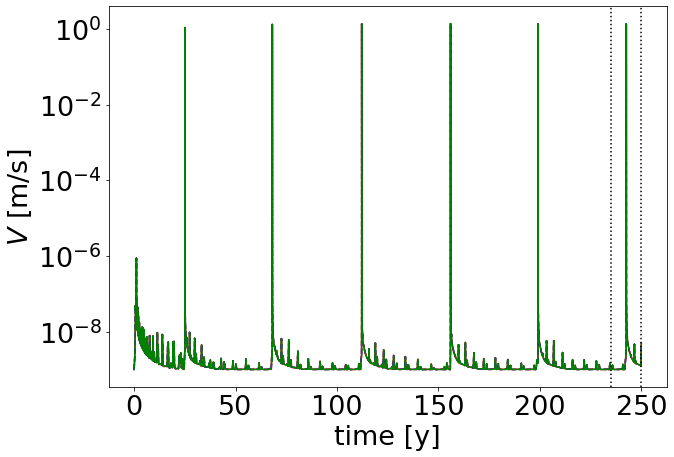

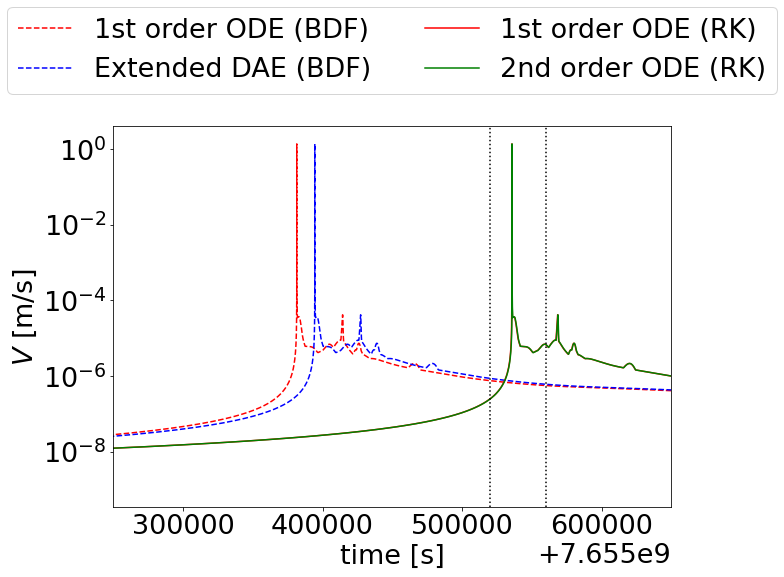

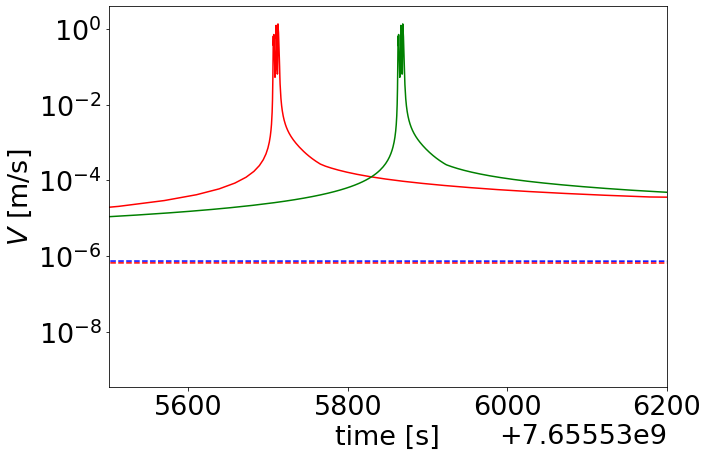

In [14]:
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})
params = {'text.latex.preamble' : [r'\usepackage{siunitx}', r'\usepackage{amsmath}']}
plt.rcParams.update(params)

plt.plot(time_years_compactODE, V_array_compactODE,'-r', label ='1st order ODE (RK)')
plt.plot(time_years_BDFcompactODE, V_array_BDFcompactODE,'--r', label ='1st order ODE (BDF)')
plt.plot(time_years_extendedDAE, V_array_extendedDAE,'--b', label ='Extended DAE (BDF)')
plt.plot(time_years_extendedODE, V_array_extendedODE,'-g', label ='2nd order ODE (RK)')

plt.axvline(x=235,Color='black',LineStyle='dotted')
plt.axvline(x=250,Color='black',LineStyle='dotted')

plt.xlabel("time [y]")
plt.ylabel(r'$V$ [m/s]')
plt.yscale('log')
#plt.legend()

plt.savefig('../results/TANDEMtimeEvolution_3D_maxSlipRate_allFormulations.png', format='png',dpi=300, bbox_inches='tight')

plt.show()

plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})
params = {'text.latex.preamble' : [r'\usepackage{siunitx}', r'\usepackage{amsmath}']}
plt.rcParams.update(params)

plt.plot(time_array_BDFcompactODE, V_array_BDFcompactODE,'--r', label ='1st order ODE (BDF)')
plt.plot(time_array_extendedDAE, V_array_extendedDAE,'--b', label ='Extended DAE (BDF)')
plt.plot(time_array_compactODE, V_array_compactODE,'-r', label ='1st order ODE (RK)')
plt.plot(time_array_extendedODE, V_array_extendedODE,'-g', label ='2nd order ODE (RK)')

plt.axvline(x=7.65552e9,Color='black',LineStyle='dotted')
plt.axvline(x=7.65556e9,Color='black',LineStyle='dotted')

plt.xlabel("time [s]")
plt.ylabel(r'$V$ [m/s]')
plt.yscale('log')
plt.legend(bbox_to_anchor=(0.5, +1.05), loc='lower center',ncol=2)

plt.xlim([7.65525e9,7.65565e9])

plt.savefig('../results/TANDEMtimeEvolution_3D_maxSlipRate_allFormulations_LastEarthquake.png', format='png',dpi=300, bbox_inches='tight')

plt.show()


plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})
params = {'text.latex.preamble' : [r'\usepackage{siunitx}', r'\usepackage{amsmath}']}
plt.rcParams.update(params)

plt.plot(time_array_compactODE, V_array_compactODE,'-r', label ='1st order ODE (RK)')
plt.plot(time_array_BDFcompactODE, V_array_BDFcompactODE,'--r', label ='1st order ODE (BDF)')
plt.plot(time_array_extendedDAE, V_array_extendedDAE,'--b', label ='Extended DAE (BDF)')
plt.plot(time_array_extendedODE, V_array_extendedODE,'-g', label ='2nd order ODE (RK)')

plt.xlabel("time [s]")
plt.ylabel(r'$V$ [m/s]')
plt.yscale('log')
#plt.legend()

plt.xlim([7.6555355e9,7.6555362e9])

plt.savefig('../results/TANDEMtimeEvolution_3D_maxSlipRate_allFormulations_LastEarthquake_Explicit.png', format='png',dpi=300, bbox_inches='tight')

plt.show()




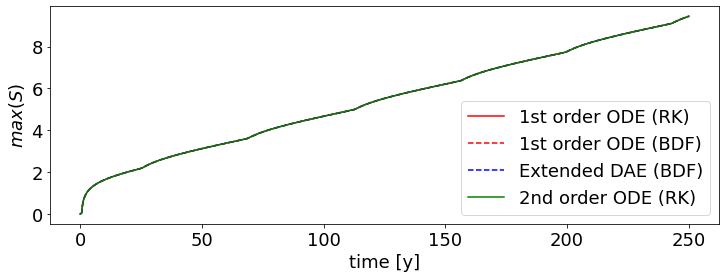

In [7]:
plt.figure(figsize=(12.00,4.00))
plt.rcParams.update({'font.size': 18})
params = {'text.latex.preamble' : [r'\usepackage{siunitx}', r'\usepackage{amsmath}']}
plt.rcParams.update(params)

plt.plot(time_years_compactODE, max_S_compactODE,'-r', label ='1st order ODE (RK)')
plt.plot(time_years_BDFcompactODE, max_S_BDFcompactODE,'--r', label ='1st order ODE (BDF)')
plt.plot(time_years_extendedDAE, max_S_extendedDAE,'--b', label ='Extended DAE (BDF)')
plt.plot(time_years_extendedODE, max_S_extendedODE,'-g', label ='2nd order ODE (RK)')

plt.xlabel("time [y]")
plt.ylabel(r'$max(S)$')
#plt.yscale('log')
plt.legend()

#plt.savefig('../results/TANDEMtimeEvolution_MinMaxPSI_Size200_RKDP5_extendedODE.png', format='png',dpi=300)

plt.show()


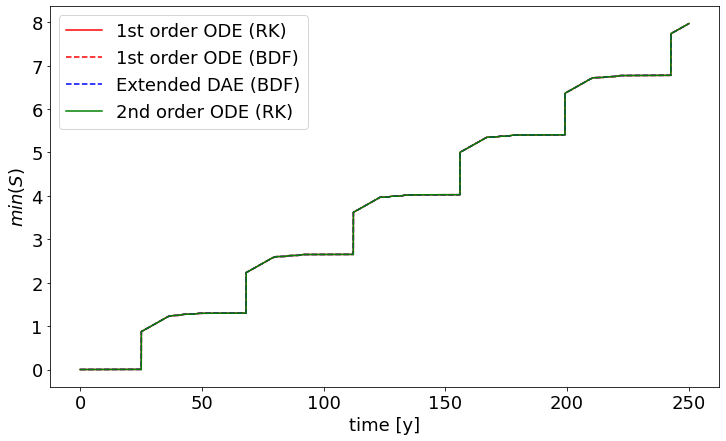

In [8]:
plt.figure(figsize=(12.00,7.00))
plt.rcParams.update({'font.size': 18})
params = {'text.latex.preamble' : [r'\usepackage{siunitx}', r'\usepackage{amsmath}']}
plt.rcParams.update(params)

plt.plot(time_years_compactODE, min_S_compactODE,'-r', label ='1st order ODE (RK)')
plt.plot(time_years_BDFcompactODE, min_S_BDFcompactODE,'--r', label ='1st order ODE (BDF)')
plt.plot(time_years_extendedDAE, min_S_extendedDAE,'--b', label ='Extended DAE (BDF)')
plt.plot(time_years_extendedODE, min_S_extendedODE,'-g', label ='2nd order ODE (RK)')


plt.xlabel("time [y]")
plt.ylabel(r'$min(S)$')
#plt.yscale('log')
plt.legend()

#plt.savefig('../results/TANDEMtimeEvolution_MinMaxPSI_Size200_RKDP5_extendedODE.png', format='png',dpi=300)

plt.show()


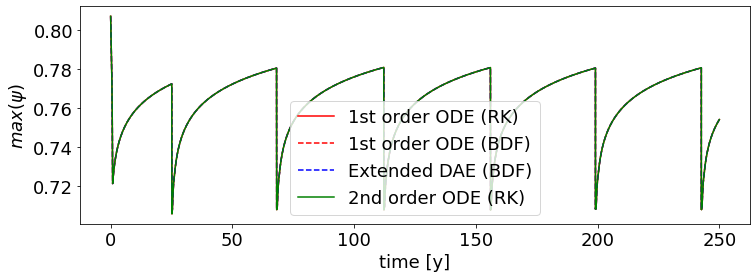

In [22]:
plt.figure(figsize=(12.00,4.00))
plt.rcParams.update({'font.size': 18})
params = {'text.latex.preamble' : [r'\usepackage{siunitx}', r'\usepackage{amsmath}']}
plt.rcParams.update(params)

plt.plot(time_years_compactODE, max_PSI_compactODE,'-r', label ='1st order ODE (RK)')
plt.plot(time_years_BDFcompactODE, max_PSI_BDFcompactODE,'--r', label ='1st order ODE (BDF)')
plt.plot(time_years_extendedDAE, max_PSI_extendedDAE,'--b', label ='Extended DAE (BDF)')
plt.plot(time_years_extendedODE, max_PSI_extendedODE,'-g', label ='2nd order ODE (RK)')

plt.xlabel("time [y]")
plt.ylabel(r'$max(\psi)$')
#plt.yscale('log')
plt.legend()

#plt.savefig('../results/TANDEMtimeEvolution_MinMaxPSI_Size200_RKDP5_extendedODE.png', format='png',dpi=300)

plt.show()


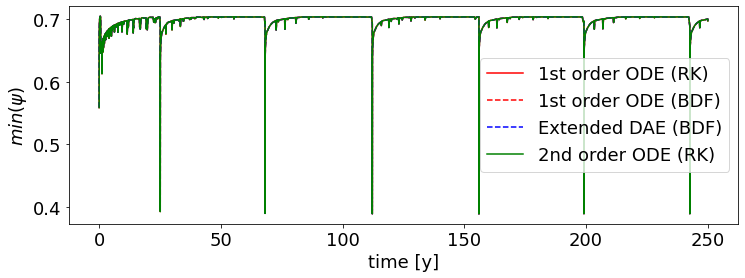

In [23]:
plt.figure(figsize=(12.00,4.00))
plt.rcParams.update({'font.size': 18})
params = {'text.latex.preamble' : [r'\usepackage{siunitx}', r'\usepackage{amsmath}']}
plt.rcParams.update(params)

plt.plot(time_years_compactODE, min_PSI_compactODE,'-r', label ='1st order ODE (RK)')
plt.plot(time_years_BDFcompactODE, min_PSI_BDFcompactODE,'--r', label ='1st order ODE (BDF)')
plt.plot(time_years_extendedDAE, min_PSI_extendedDAE,'--b', label ='Extended DAE (BDF)')
plt.plot(time_years_extendedODE, min_PSI_extendedODE,'-g', label ='2nd order ODE (RK)')

plt.xlabel("time [y]")
plt.ylabel(r'$min(\psi)$')
#plt.yscale('log')
plt.legend()

#plt.savefig('../results/TANDEMtimeEvolution_MinMaxPSI_Size200_RKDP5_extendedODE.png', format='png',dpi=300)

plt.show()


In [29]:
print('Solve times: ')
print('1st order ODE (RK):  ', solve_time_compactODE)
print('1st order ODE (BDF): ', solve_time_BDFcompactODE)
print('extended DAE (BDF):  ', solve_time_extendedDAE)
print('2nd order ODE (RK):  ', solve_time_extendedODE)
print('Initialization times: ')
print('1st order ODE (RK):  ', initialization_time_compactODE)
print('1st order ODE (BDF): ', initialization_time_BDFcompactODE)
print('extended DAE (BDF):  ', initialization_time_extendedDAE)
print('2nd order ODE (RK):  ', initialization_time_extendedODE)
print('Number of timesteps: ')
print('1st order ODE (RK):  ', np.size(time_years_compactODE))
print('1st order ODE (BDF): ', np.size(time_years_BDFcompactODE))
print('extended DAE (BDF):  ', np.size(time_years_extendedDAE))
print('2nd order ODE (RK):  ', np.size(time_years_extendedODE))



Solve times: 
1st order ODE (RK):   62977.5630227630027
1st order ODE (BDF):  34099.2048131679985
extended DAE (BDF):   33117.8925823329992
2nd order ODE (RK):   2586.92880669499982
Number of timesteps: 
1st order ODE (RK):   41361
1st order ODE (BDF):  34118
extended DAE (BDF):   34289
2nd order ODE (RK):   74561
Initialization times: 
1st order ODE (RK):   66.4210576520000018
1st order ODE (BDF):  247.529858987000011
extended DAE (BDF):   238.241731654999995
2nd order ODE (RK):   180.478370289999987
